In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import spacy

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
df=pd.read_csv("/content/threads_reviews.csv")

In [6]:
df.head(5)

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              32910 non-null  object
 1   review_description  32910 non-null  object
 2   rating              32910 non-null  int64 
 3   review_date         32910 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


In [8]:
df.shape

(32910, 4)

In [10]:
df.columns

Index(['source', 'review_description', 'rating', 'review_date'], dtype='object')

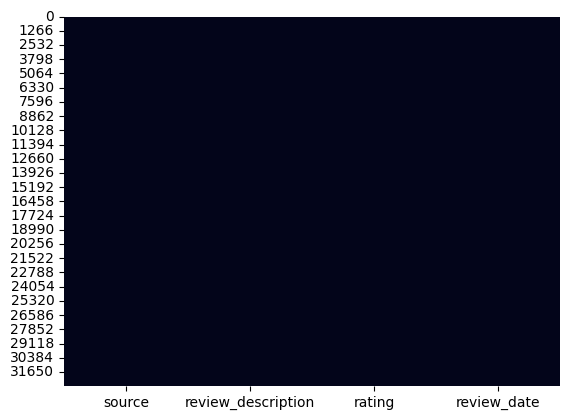

In [11]:
sns.heatmap(df.isnull(),cbar=False)
plt.show()

In [12]:
df['source'].value_counts()

Google Play    30270
App Store       2640
Name: source, dtype: int64

In [13]:
df['review_description']

0        Meh. Not the greatest experience on a Chromebo...
1        Pretty good for a first launch!! Its easy to u...
2        For a brand new app, it's very well optimized....
3        Great app with a lot of potential! However, th...
4        The app is good, but it needs a lot of functio...
                               ...                        
32905    This killed my dog. Mark zuckerburg strangled ...
32906                Add Search and hashtag like Twitter !
32907                                          bad twister
32908                         Yet another trash from Meta.
32909    Nothing special this app is just a copy of twi...
Name: review_description, Length: 32910, dtype: object

In [14]:
df['rating'].value_counts()

5    15559
1     9726
4     3244
3     2585
2     1796
Name: rating, dtype: int64

In [15]:
df['review_date']

0        2023-07-08 14:18:24
1        2023-07-19 20:52:48
2        2023-07-06 23:03:11
3        2023-07-10 00:53:25
4        2023-07-06 16:57:43
                ...         
32905    2023-07-06 01:23:55
32906    2023-07-19 08:01:06
32907    2023-07-17 06:39:13
32908    2023-07-07 17:47:16
32909    2023-07-07 07:01:43
Name: review_date, Length: 32910, dtype: object

In [16]:
#extract date,week,month
df['review_date']=pd.to_datetime(df['review_date'])
df['date']=df['review_date'].dt.date
df['week']=df['review_date'].dt.isocalendar().week
df['month']=df['review_date'].dt.month

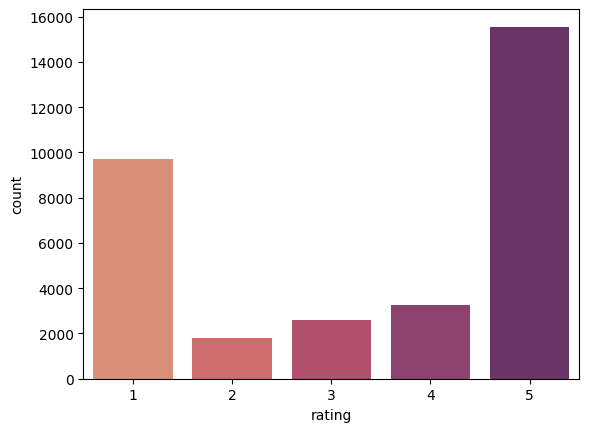

In [17]:
sns.countplot(data=df,x='rating',palette="flare")
plt.show()

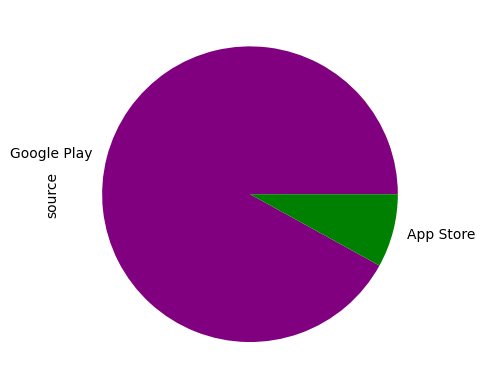

In [18]:
color=['purple','green']
df['source'].value_counts().plot(kind='pie',colors=color)
plt.show()

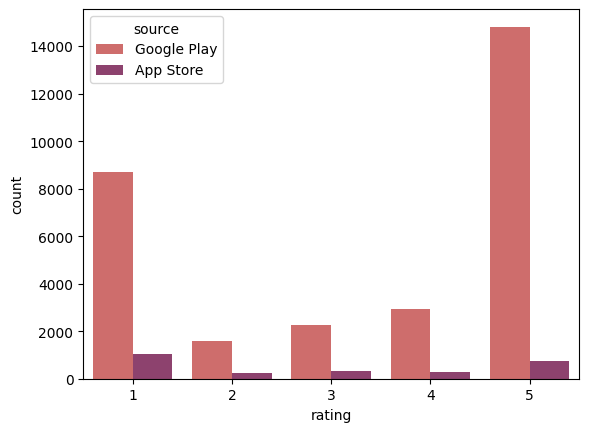

In [19]:
sns.countplot(data=df,x='rating',palette="flare",hue="source")
plt.show()